# Import Librelies

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read data files

In [42]:
def read_data(filepath):
    """reads the data file."""
    df = pd.read_csv(filepath)
    return df

In [43]:
customer_profiles_path = '/kaggle/input/credit-card-transactions-synthetic-data-generation/customer_profiles_table.csv'
terminal_profiles_path = '/kaggle/input/credit-card-transactions-synthetic-data-generation/terminal_profiles_table.csv'
transactions_path = '/kaggle/input/credit-card-transactions-synthetic-data-generation/transactions_df.csv'

In [66]:
df_customer_profile = read_data(customer_profiles_path)
df_customer_profile.sample(5)

,customer_id,mean_amount,std_amount,mean_nb_tx_per_day,network_id,bin,lat_customer,log_customer,available_terminals,nb_terminals
3494,C00004494,32.678224,16.339112,1.068137,D,364081,40.7527,9.0129,"['T001053', 'T001090', 'T001012', 'T001009', '...",7
2887,C00003887,62.238687,31.119344,2.014042,A,375686,37.9723,9.4947,"['T001048', 'T001047', 'T001039', 'T001018', '...",6
4580,C00005580,64.026841,32.013420,0.021240,A,375570,37.7825,9.4801,"['T001047', 'T001039', 'T001086', 'T001002', '...",6
2341,C00003341,60.085777,30.042889,1.304357,A,375617,41.2445,8.6877,"['T001060', 'T001092', 'T001090', 'T001074', '...",12
3875,C00004875,10.686848,5.343424,2.991031,D,361855,41.6111,8.8675,"['T001064', 'T001074', 'T001021', 'T001042', '...",13


In [67]:
df_terminal_profiles = read_data(terminal_profiles_path)
df_terminal_profiles.sample(5)

,terminal_id,lat_terminal,log_terminal,mcc
7,T001007,39.9766,8.7807,5814
9,T001009,40.3890,8.8419,5813
81,T001081,39.8609,7.6803,3501
34,T001034,38.0315,7.7772,5651
65,T001065,40.7669,8.2035,742


In [46]:
df_transactions = read_data(transactions_path)
df_transactions.sample(5)

,transaction_id,post_ts,customer_id,bin,terminal_id,amt,entry_mode,fraud,fraud_scenario
1305703,G2Hog881T5WF6bAqyqH5Iw,2023-06-12 14:03:47,C00003241,515635,T001034,167.75,Swipe,0,0
1680852,SDkm4L3hTzOdKGT5XQrmDA,2023-07-20 11:38:18,C00004723,375617,T001039,2.93,Swipe,0,0
1127503,djBjY9b0SIm-QVZCWSENPw,2023-05-25 14:53:45,C00003402,377893,T001044,91.59,Contactless,0,0
1612390,9q1GSSYcQfWjTGEwUiLhcw,2023-07-13 12:24:34,C00001923,512299,T001038,7.74,Swipe,0,0
1221172,Rr7p52pfQlugGMUiqoYJBg,2023-06-04 06:03:29,C00002348,375562,T001089,12.00,Chip,1,2


In [47]:
df_transactions[df_transactions['fraud'] == 1].sample(5)

,transaction_id,post_ts,customer_id,bin,terminal_id,amt,entry_mode,fraud,fraud_scenario
1139576,cVI-2W5VQiKLHfxMwGWJTg,2023-05-26 19:20:45,C00003926,547260,T001022,32.50,Contactless,1,2
247860,nQTKR_6VTDOhrKPxR2abhg,2023-02-25 22:27:04,C00003241,515635,T001015,150.87,Chip,1,2
989497,Cqwz8hHnRvOuh783r92Reg,2023-05-11 16:47:47,C00002353,415174,T001080,63.82,Swipe,1,2
611193,S8bq87rxQfybtdRk6Ra1Yw,2023-04-03 14:55:47,C00004395,524724,T001048,19.85,Chip,1,2
1170218,X5ceaCFLTyyWC4kUw9esIQ,2023-05-29 22:03:18,C00003546,510061,T001020,114.63,Chip,1,2


# Get overview of the data

## customer_profiles

In [48]:
df_customer_profile.shape

(5000, 10)

In [49]:
df_customer_profile.columns.tolist()

['customer_id',
 'mean_amount',
 'std_amount',
 'mean_nb_tx_per_day',
 'network_id',
 'bin',
 'lat_customer',
 'log_customer',
 'available_terminals',
 'nb_terminals']

In [50]:
df_customer_profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_id          5000 non-null   object 
 1   mean_amount          5000 non-null   float64
 2   std_amount           5000 non-null   float64
 3   mean_nb_tx_per_day   5000 non-null   float64
 4   network_id           5000 non-null   object 
 5   bin                  5000 non-null   int64  
 6   lat_customer         5000 non-null   float64
 7   log_customer         5000 non-null   float64
 8   available_terminals  5000 non-null   object 
 9   nb_terminals         5000 non-null   int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 390.8+ KB


## terminal profiles

In [51]:
df_terminal_profiles.shape

(100, 4)

In [52]:
df_terminal_profiles.columns.tolist()

['terminal_id', 'lat_terminal', 'log_terminal', 'mcc']

In [53]:
df_terminal_profiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   terminal_id   100 non-null    object 
 1   lat_terminal  100 non-null    float64
 2   log_terminal  100 non-null    float64
 3   mcc           100 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 3.3+ KB


## transactions

In [54]:
df_transactions.shape

(1785308, 9)

In [55]:
df_transactions.columns.tolist()

['transaction_id',
 'post_ts',
 'customer_id',
 'bin',
 'terminal_id',
 'amt',
 'entry_mode',
 'fraud',
 'fraud_scenario']

In [56]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1785308 entries, 0 to 1785307
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   transaction_id  object 
 1   post_ts         object 
 2   customer_id     object 
 3   bin             int64  
 4   terminal_id     object 
 5   amt             float64
 6   entry_mode      object 
 7   fraud           int64  
 8   fraud_scenario  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 122.6+ MB


# Data preprocession

**Dataset: transactions**

In [57]:
# Make sure the post_ts column is in datetime format
df_transactions['post_ts'] = pd.to_datetime(df_transactions['post_ts'])

# Create new columns for day, hour, month, and day of week
df_transactions['day'] = df_transactions['post_ts'].dt.day
df_transactions['hour'] = df_transactions['post_ts'].dt.hour
df_transactions['month'] = df_transactions['post_ts'].dt.month
df_transactions['weekday'] = df_transactions['post_ts'].dt.day_name()

In [64]:
df_transactions['month'].unique()

array([2, 3, 4, 5, 6, 7], dtype=int32)

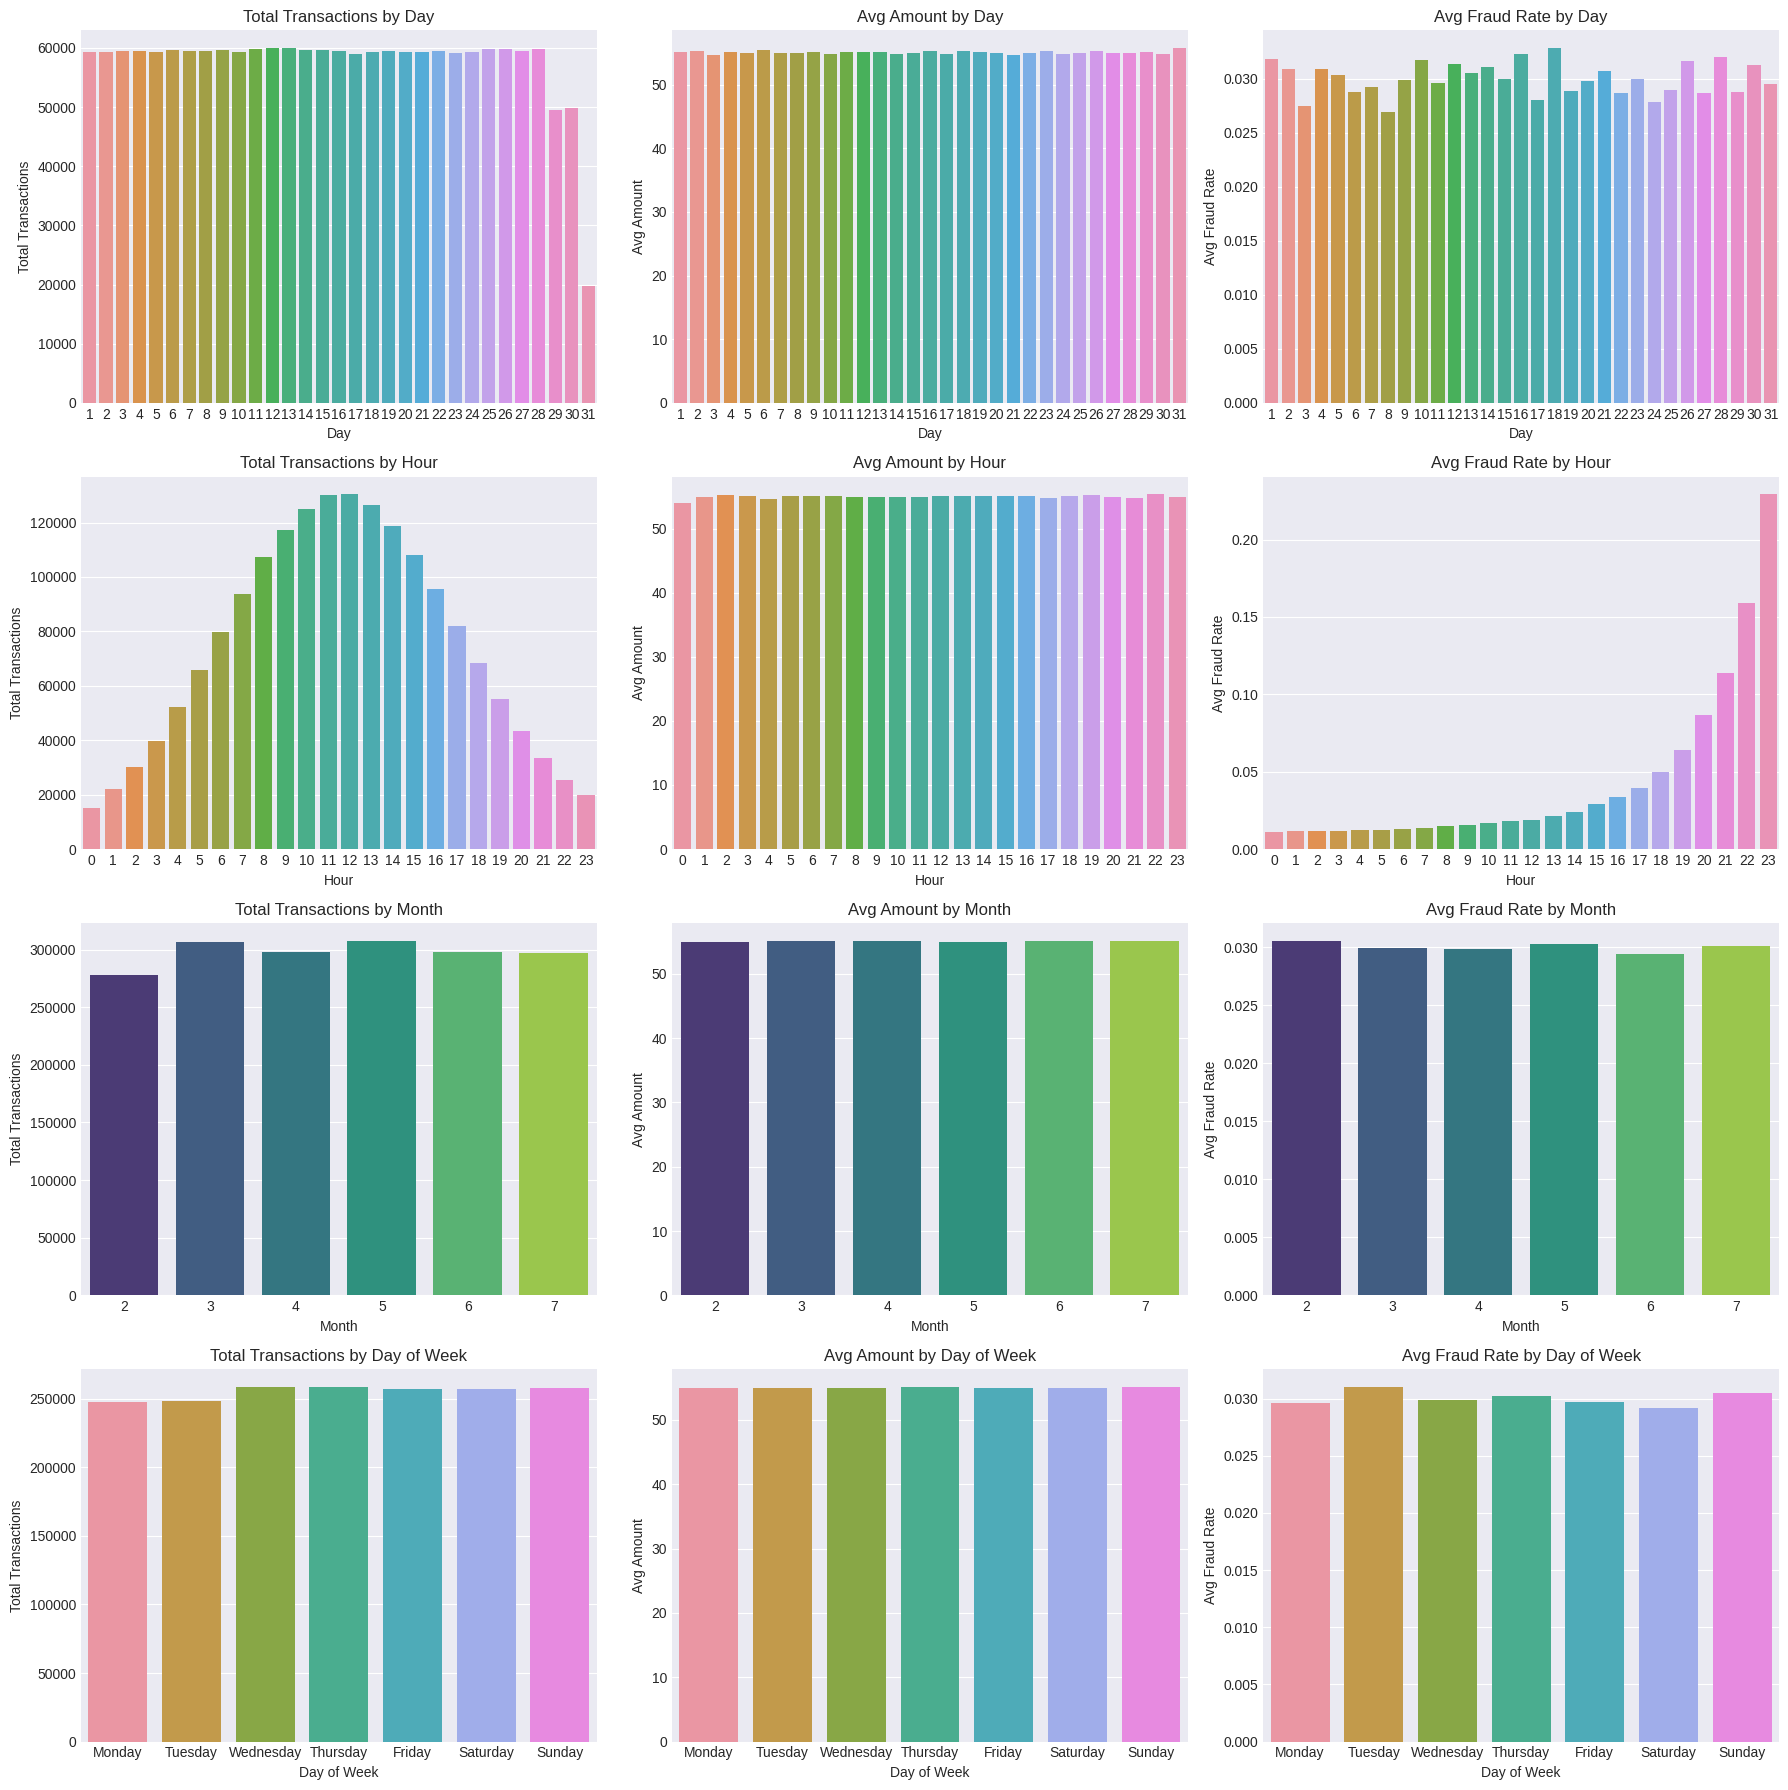

In [65]:
# Create a figure with a grid of subplots
fig, axes = plt.subplots(4, 3, figsize=(18, 18))
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('viridis')

# --- Plot 1: By Day of Month ---
# Aggregate data by day
daily_metrics = df_transactions.groupby('day').agg(
    total_transactions=('transaction_id', 'count'),
    avg_amount=('amt', 'mean'),
    avg_fraud_rate=('fraud', 'mean')
).reset_index()

sns.barplot(x='day', y='total_transactions', data=daily_metrics, ax=axes[0, 0])
axes[0, 0].set_title('Total Transactions by Day')
axes[0, 0].set_xlabel('Day')
axes[0, 0].set_ylabel('Total Transactions')

sns.barplot(x='day', y='avg_amount', data=daily_metrics, ax=axes[0, 1])
axes[0, 1].set_title('Avg Amount by Day')
axes[0, 1].set_xlabel('Day')
axes[0, 1].set_ylabel('Avg Amount')

sns.barplot(x='day', y='avg_fraud_rate', data=daily_metrics, ax=axes[0, 2])
axes[0, 2].set_title('Avg Fraud Rate by Day')
axes[0, 2].set_xlabel('Day')
axes[0, 2].set_ylabel('Avg Fraud Rate')

# --- Plot 2: By Hour of Day ---
# Aggregate data by hour
hourly_metrics = df_transactions.groupby('hour').agg(
    total_transactions=('transaction_id', 'count'),
    avg_amount=('amt', 'mean'),
    avg_fraud_rate=('fraud', 'mean')
).reset_index()

sns.barplot(x='hour', y='total_transactions', data=hourly_metrics, ax=axes[1, 0])
axes[1, 0].set_title('Total Transactions by Hour')
axes[1, 0].set_xlabel('Hour')
axes[1, 0].set_ylabel('Total Transactions')

sns.barplot(x='hour', y='avg_amount', data=hourly_metrics, ax=axes[1, 1])
axes[1, 1].set_title('Avg Amount by Hour')
axes[1, 1].set_xlabel('Hour')
axes[1, 1].set_ylabel('Avg Amount')

sns.barplot(x='hour', y='avg_fraud_rate', data=hourly_metrics, ax=axes[1, 2])
axes[1, 2].set_title('Avg Fraud Rate by Hour')
axes[1, 2].set_xlabel('Hour')
axes[1, 2].set_ylabel('Avg Fraud Rate')

# --- Plot 3: By Month ---
# Aggregate data by month
monthly_metrics = df_transactions.groupby('month').agg(
    total_transactions=('transaction_id', 'count'),
    avg_amount=('amt', 'mean'),
    avg_fraud_rate=('fraud', 'mean')
).reset_index()

sns.barplot(x='month', y='total_transactions', data=monthly_metrics, ax=axes[2, 0])
axes[2, 0].set_title('Total Transactions by Month')
axes[2, 0].set_xlabel('Month')
axes[2, 0].set_ylabel('Total Transactions')

sns.barplot(x='month', y='avg_amount', data=monthly_metrics, ax=axes[2, 1])
axes[2, 1].set_title('Avg Amount by Month')
axes[2, 1].set_xlabel('Month')
axes[2, 1].set_ylabel('Avg Amount')

sns.barplot(x='month', y='avg_fraud_rate', data=monthly_metrics, ax=axes[2, 2])
axes[2, 2].set_title('Avg Fraud Rate by Month')
axes[2, 2].set_xlabel('Month')
axes[2, 2].set_ylabel('Avg Fraud Rate')

# --- Plot 4: By Day of Week ---
# Aggregate data by day of week
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
weekday_metrics = df_transactions.groupby('weekday').agg(
    total_transactions=('transaction_id', 'count'),
    avg_amount=('amt', 'mean'),
    avg_fraud_rate=('fraud', 'mean')
).reindex(day_order).reset_index()

sns.barplot(x='weekday', y='total_transactions', data=weekday_metrics, ax=axes[3, 0])
axes[3, 0].set_title('Total Transactions by Day of Week')
axes[3, 0].set_xlabel('Day of Week')
axes[3, 0].set_ylabel('Total Transactions')

sns.barplot(x='weekday', y='avg_amount', data=weekday_metrics, ax=axes[3, 1])
axes[3, 1].set_title('Avg Amount by Day of Week')
axes[3, 1].set_xlabel('Day of Week')
axes[3, 1].set_ylabel('Avg Amount')

sns.barplot(x='weekday', y='avg_fraud_rate', data=weekday_metrics, ax=axes[3, 2])
axes[3, 2].set_title('Avg Fraud Rate by Day of Week')
axes[3, 2].set_xlabel('Day of Week')
axes[3, 2].set_ylabel('Avg Fraud Rate')

# # Add this line to save the figure
# plt.savefig('transaction_analysis_plots.png', dpi=300) 

plt.tight_layout()
plt.show()